In [1]:
# MNIST Dataset
# Handwritten digits Recognition

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import(
  accuracy_score,
  confusion_matrix,
  ConfusionMatrixDisplay,
  classification_report
)

from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)


Loading MNIST dataset ...
Dataset Shape: (70000, 784)
Labels Shape: (70000,)
Number of Classes: 10
Pixel value range: [0.0, 255.0]


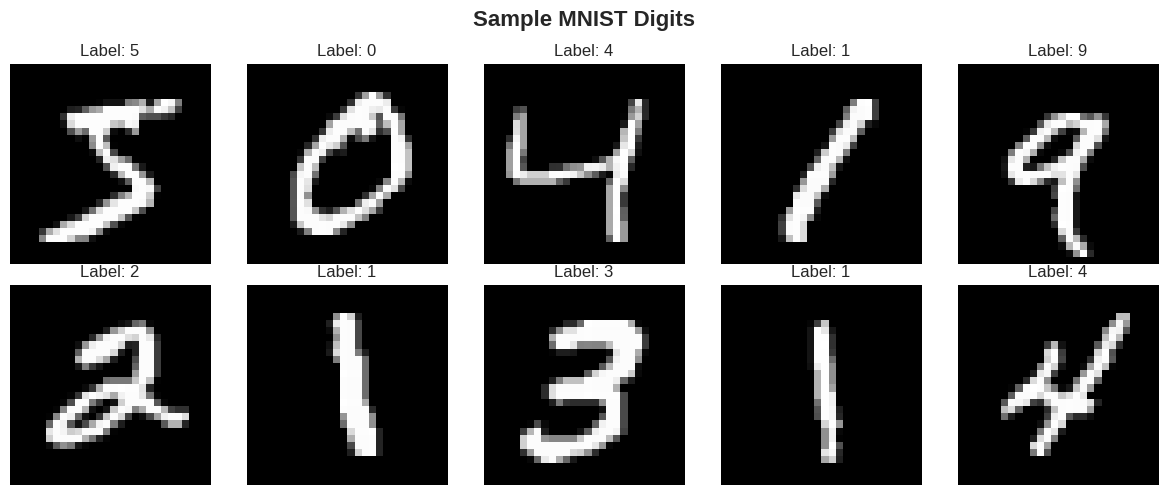

In [2]:
# Load MNIST dataset
print("Loading MNIST dataset ...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target

X = np.array(X, dtype='float32')
y = np.array(y, dtype='int')

print(f"Dataset Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")
print(f"Number of Classes: {len(np.unique(y))}")
print(f"Pixel value range: [{X.min()}, {X.max()}]")

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
  ax.imshow(X[i].reshape(28, 28), cmap='gray')
  ax.set_title(f"Label: {y[i]}", fontsize=12)
  ax.axis('off')

plt.tight_layout()
plt.show()


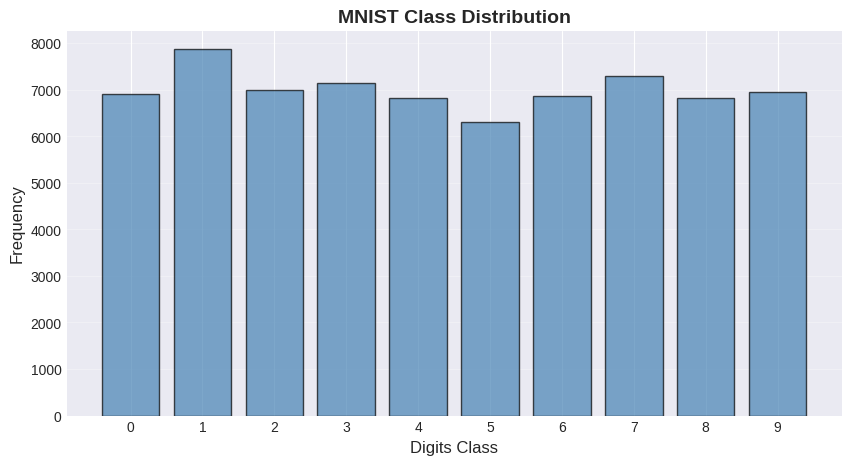


Class distribution:
Digit 0: 6903 samples (9.9%)
Digit 1: 7877 samples (11.3%)
Digit 2: 6990 samples (10.0%)
Digit 3: 7141 samples (10.2%)
Digit 4: 6824 samples (9.7%)
Digit 5: 6313 samples (9.0%)
Digit 6: 6876 samples (9.8%)
Digit 7: 7293 samples (10.4%)
Digit 8: 6825 samples (9.8%)
Digit 9: 6958 samples (9.9%)


In [3]:
# Class Distribution

plt.figure(figsize=(10, 5))
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts, color='steelblue',
        edgecolor='black', alpha=0.7)
plt.xlabel('Digits Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('MNIST Class Distribution', fontsize=14,
          fontweight='bold')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nClass distribution:")
for digit, count in zip(unique, counts):
  print(f"Digit {digit}: {count} samples ({count/len(y)*100:.1f}%)")


In [4]:
# Split dataset


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 56000
Test set size: 14000


In [6]:
# Feature Scaling
# Fit scaler on TRAIN only; transform TEST to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Feature Scaled")
print(f"Scaled feature mean (train): {X_train_scaled.mean():.4f}")
print(f"Scaled feature std (train): {X_train_scaled.std():.4f}")



 Feature Scaled
Scaled feature mean (train): 0.0000
Scaled feature std (train): 0.9570


In [7]:
# MLP
# Enable early stopping to reduce overfitting and speed up convergence

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # 784 -> 128 -> 64
    activation='relu',
    solver='adam',
    alpha=0.0001,                   # L2 regularization strength
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=100,                   # higher cap; training will stop early if converged
    early_stopping=True,
    validation_fraction=0.1,        # hold-out validation inside training
    n_iter_no_change=5,             # patience
    random_state=42,
    verbose=True
)


In [8]:
print("MLP Architecture:")
print(f"  Input Layer: 784 neurons (28 * 28 pixels)")
print(f"  Hidden Layer 1: 128 neurons (ReLU)")
print(f"  Hidden Layer 2: 64 neurons (ReLU)")
print(f"  Output Layer: 10 neurons (Softmax)")
print(f"\nTotal parameters: ~{(784*128 + 128*64 + 64*10):,}")


MLP Architecture:
  Input Layer: 784 neurons (28 * 28 pixels)
  Hidden Layer 1: 128 neurons (ReLU)
  Hidden Layer 2: 64 neurons (ReLU)
  Output Layer: 10 neurons (Softmax)

Total parameters: ~109,184


In [9]:
import time

print("\n" + "="*50)
print("Training MLP Model ...")
print("="*50)

start_time = time.time()
mlp.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"\n Training completed in {training_time:.2f} seconds")
print(f"Number of iterations: {mlp.n_iter_}")
print(f"Final loss: {mlp.loss_:.6f}")



Training MLP Model ...
Iteration 1, loss = 0.34770671
Validation score: 0.952500
Iteration 2, loss = 0.11853345
Validation score: 0.962500
Iteration 3, loss = 0.07755117
Validation score: 0.964464
Iteration 4, loss = 0.05266361
Validation score: 0.968750
Iteration 5, loss = 0.03715057
Validation score: 0.969821
Iteration 6, loss = 0.02776035
Validation score: 0.969643
Iteration 7, loss = 0.02038427
Validation score: 0.971607
Iteration 8, loss = 0.01492294
Validation score: 0.975000
Iteration 9, loss = 0.01401051
Validation score: 0.971250
Iteration 10, loss = 0.01477461
Validation score: 0.967857
Iteration 11, loss = 0.01592733
Validation score: 0.971786
Iteration 12, loss = 0.01248322
Validation score: 0.972321
Iteration 13, loss = 0.00948340
Validation score: 0.971964
Iteration 14, loss = 0.00614981
Validation score: 0.974643
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.

 Training completed in 24.76 seconds
Number of iterations: 14
Fina

In [10]:
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*50)
print("MODEL PERFORMANCE")
print("="*50)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Generalization Gap: {(train_accuracy - test_accuracy)*100:.2f}%")


MODEL PERFORMANCE
Training Accuracy: 99.59%
Test Accuracy: 97.18%
Generalization Gap: 2.41%


In [11]:
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_test_pred))



CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1381
           1       0.99      0.98      0.98      1575
           2       0.97      0.97      0.97      1398
           3       0.97      0.97      0.97      1428
           4       0.98      0.97      0.97      1365
           5       0.95      0.97      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.96      0.97      0.97      1459
           8       0.98      0.96      0.97      1365
           9       0.97      0.96      0.96      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



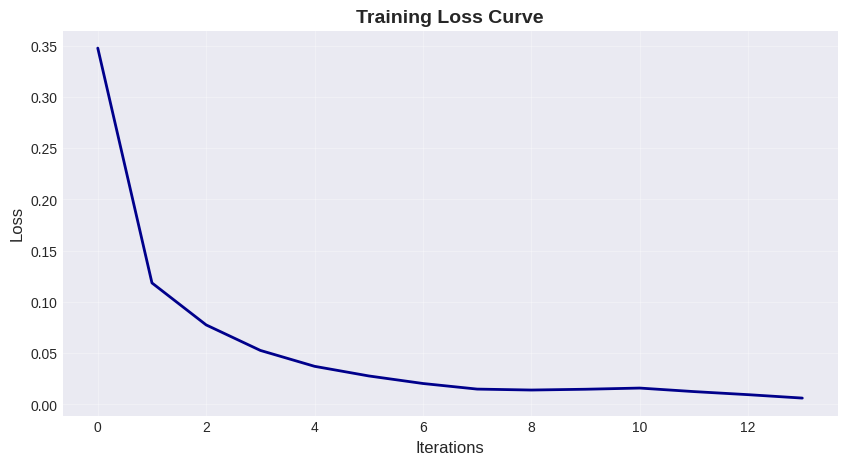

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, linewidth=2, color='darkblue')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 1000x800 with 0 Axes>

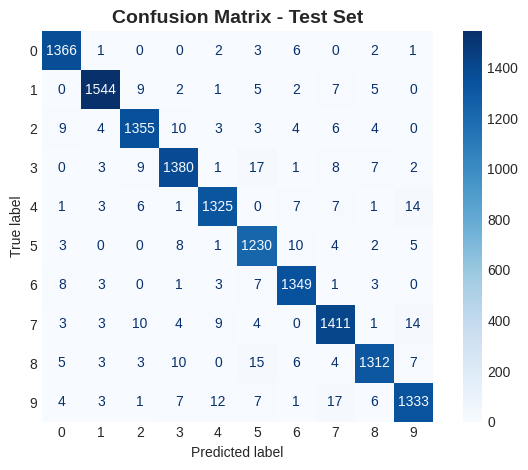


Per-class Accuracy:
Digit 0: 98.91%
Digit 1: 98.03%
Digit 2: 96.92%
Digit 3: 96.64%
Digit 4: 97.07%
Digit 5: 97.39%
Digit 6: 98.11%
Digit 7: 96.71%
Digit 8: 96.12%
Digit 9: 95.83%


In [21]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(10))

# draw
disp.plot(cmap='Blues', values_format='d')

# FIX: disable any grid on this axes (style may enable it)
ax = disp.ax_
ax.grid(False)  # <- critical: remove horizontal/vertical lines

# optional cosmetics
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Confusion Matrix - Test Set', fontsize=14,  fontweight='bold')
plt.tight_layout()
plt.show()


# Per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for digit, acc in enumerate(class_accuracy):
  print(f"Digit {digit}: {acc*100:.2f}%")


[ 2900  3143  8231  3855  8045  7653  8610  7310 10175  5538 13406  5733
 10739  4649  4045]


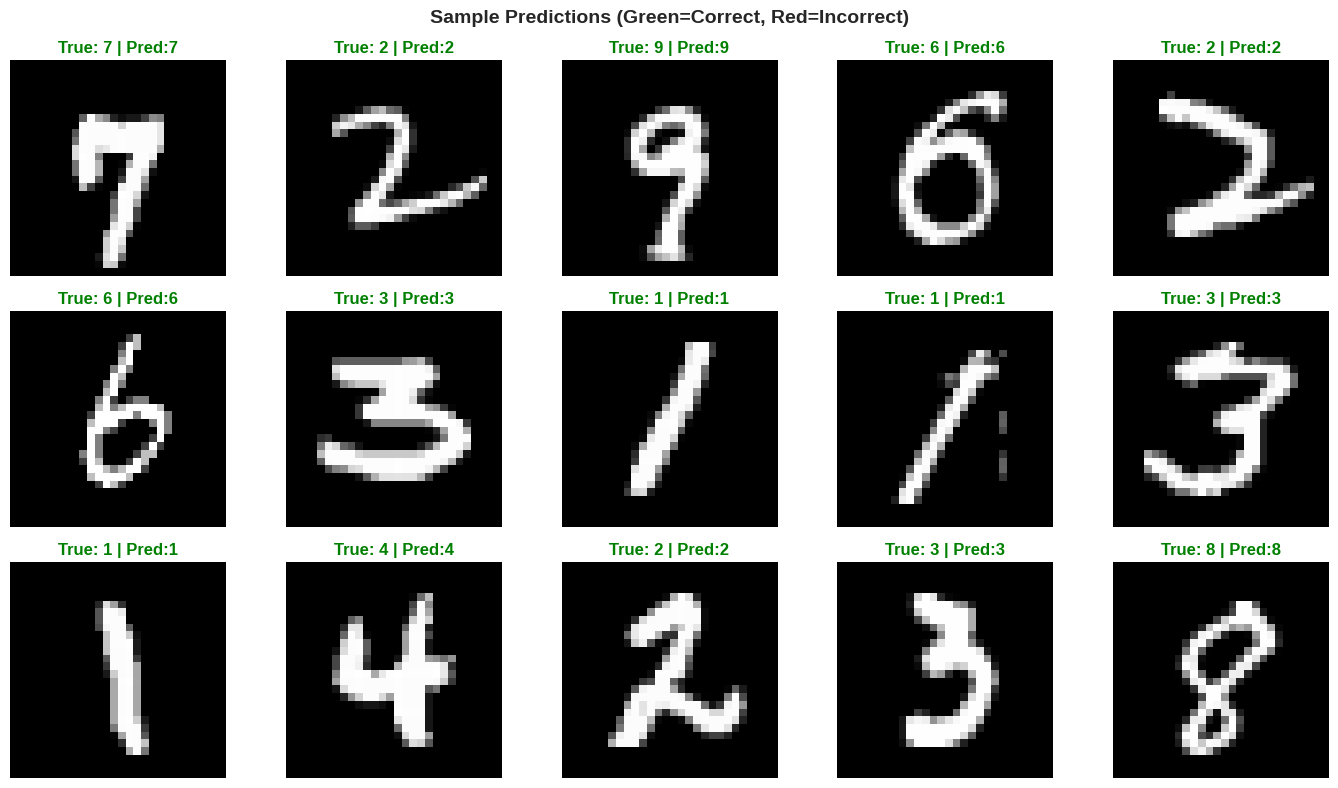

In [15]:
# Visualize Predictions
fig, axes = plt.subplots(3, 5, figsize = (14, 8))
fig.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize =14, fontweight = 'bold')

sample_indices = np.random.choice(len(X_test), 15, replace=False)
print(sample_indices)

for i, (ax, idx) in enumerate(zip(axes.flat, sample_indices)):
  image = X_test[idx].reshape(28, 28)
  true_label = y_test[idx]
  pred_label = y_test_pred[idx]

  ax.imshow(image, cmap='gray')

  # Color title based on correctness
  color = 'green' if true_label == pred_label else 'red'
  ax.set_title(f'True: {true_label} | Pred:{pred_label}',
               color=color, fontweight='bold')
  ax.axis('off')

plt.tight_layout()
plt.show()



 Total misclassified samples: 395


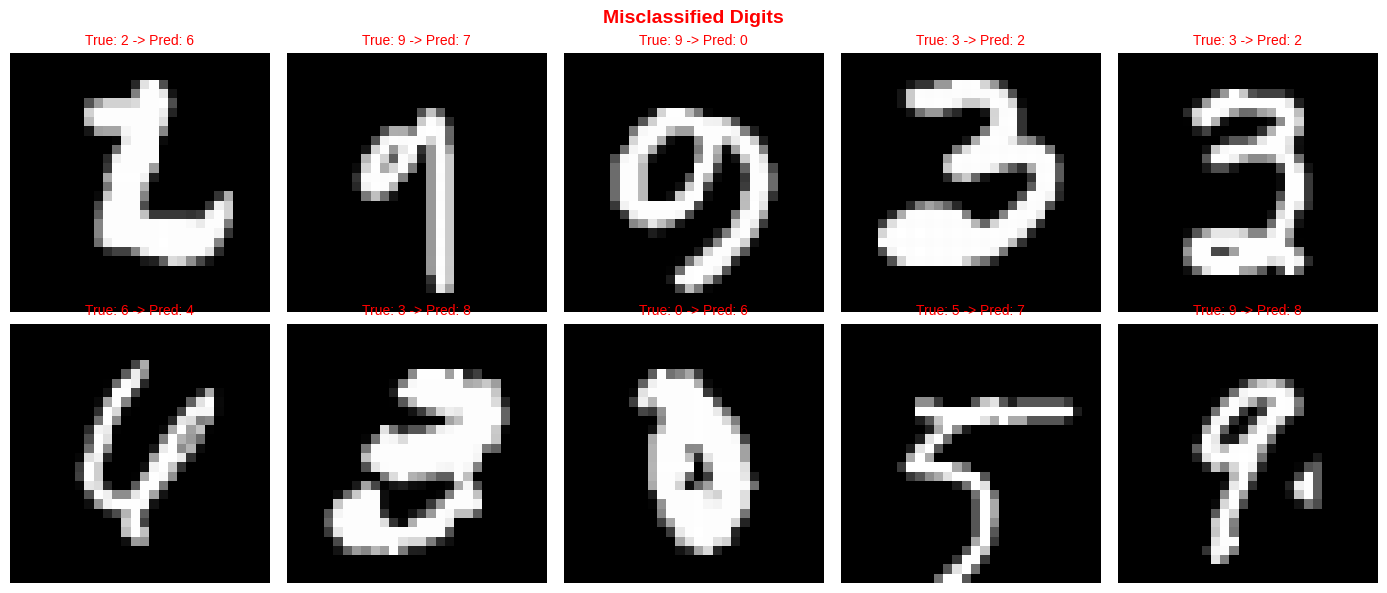

In [16]:
# Misclassified examples

misclassified_idx = np.where(y_test != y_test_pred)[0]
print(f"\n Total misclassified samples: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
  fig, axes = plt.subplots(2, 5, figsize=(14, 6))
  fig.suptitle('Misclassified Digits', fontsize = 14, fontweight = 'bold', color = 'red')

  for i, ax in enumerate(axes.flat):
    if i < len(misclassified_idx):
      idx = misclassified_idx[i]
      image = X_test[idx].reshape(28, 28)
      ax.imshow(image, cmap='gray')
      ax.set_title(f"True: {y_test[idx]} -> Pred: {y_test_pred[idx]}", color='red', fontsize= 10)

    ax.axis('off')

  plt.tight_layout()
  plt.show()


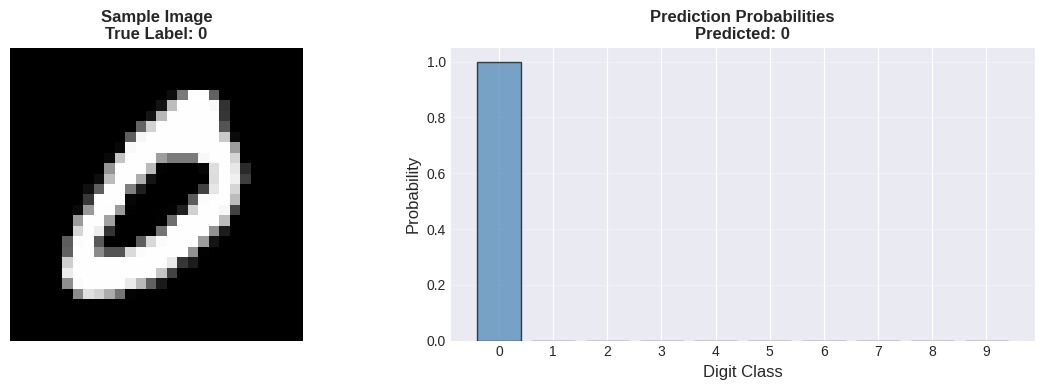

Prediction probabilities:
  Digit 0 : 100.00%
  Digit 1 : 0.00%
  Digit 2 : 0.00%
  Digit 3 : 0.00%
  Digit 4 : 0.00%
  Digit 5 : 0.00%
  Digit 6 : 0.00%
  Digit 7 : 0.00%
  Digit 8 : 0.00%
  Digit 9 : 0.00%


In [17]:
# Get prediction probabilities for a sample

sample_idx = 1723
sample_probs = mlp.predict_proba(X_test_scaled[sample_idx:sample_idx+1])[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

# Show image
ax1.imshow(X_test[sample_idx].reshape(28, 28), cmap='gray')
ax1.set_title(f"Sample Image\nTrue Label: {y_test[sample_idx]}",
              fontsize = 12, fontweight = 'bold')

ax1.axis('off')

# Show probability distribution
ax2.bar(range(10), sample_probs, color = 'steelblue', edgecolor='black', alpha = 0.7)
ax2.set_xlabel("Digit Class", fontsize = 12)
ax2.set_ylabel("Probability", fontsize = 12)
ax2.set_title(f"Prediction Probabilities\nPredicted: {y_test_pred[sample_idx]}",
              fontsize = 12, fontweight = 'bold')

ax2.set_xticks(range(10))
ax2.grid(axis = 'y', alpha = 0.3)  # FIX: use ax2.grid (not ax.grid)

plt.tight_layout()
plt.show()

print("Prediction probabilities:")
for digit, prob in enumerate(sample_probs):
  print(f"  Digit {digit} : {prob*100:.2f}%")


In [18]:
# Final summary
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"Model Type: Multi-layer Perceptron (MLPClassifier)")
print(f"Architecture: 784 -> 128 -> 64 -> 10")
print(f"Activation: ReLU (hidden), Softmax (output)")
print(f"Optimizer: Adam")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Total Predictions: {len(y_test)}")
print(f"Correct Predictions: {(y_test == y_test_pred).sum()}")
print(f"Incorrect Predictions: {(y_test != y_test_pred).sum()}")  # FIX: typo "InCorrect" -> "Incorrect"
print("="*60)



FINAL MODEL SUMMARY
Model Type: Multi-layer Perceptron (MLPClassifier)
Architecture: 784 -> 128 -> 64 -> 10
Activation: ReLU (hidden), Softmax (output)
Optimizer: Adam
Training Time: 24.76 seconds
Training Accuracy: 99.59%
Test Accuracy: 97.18%
Total Predictions: 14000
Correct Predictions: 13605
Incorrect Predictions: 395


In [19]:
# Total weights (parameters)
total_weights = sum(coef.size for coef in mlp.coefs_)
total_biases = sum(intercept.size for intercept in mlp.intercepts_)

total_params = total_weights + total_biases

print(f"Total Parameters: {total_params:,}")
print(f"  Weights: {total_weights:,}")
print(f"  Biases: {total_biases:,}")


Total Parameters: 109,386
  Weights: 109,184
  Biases: 202
